In [1]:
import pandas as pd
# tqdm means "progress" in Arabic
from tqdm import tqdm
import os
from gensim.models import KeyedVectors
import operator
tqdm.pandas()

def load_data(datapath):
    print("loading data")
    df_train = pd.read_csv(os.path.join(datapath, "train.csv"))
    df_test = pd.read_csv(os.path.join(datapath, "test.csv"))
    print("train data with shape: ", df_train.shape)
    print("test data with shape: ", df_test.shape)
    print("train data tags: ", df_train.columns.values)
    print("example in train data: \n", df_train.iloc[0:1, :])
    print("test data tags: ", df_test.columns.values)
    print("example in test data: \n", df_test.iloc[0:1, :])
    return df_train, df_test

In [2]:
def add_features(df):
    df['num_words'] = df.question_text.str.count('\S+')
    df['num_unique_words'] = df['question_text'].progress_apply(lambda comment: len(set(w for w in comment.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']  
    return df

In [3]:
DATA_PATH = './data/'
train, test = load_data(DATA_PATH)

loading data
train data with shape:  (1306122, 3)
test data with shape:  (375806, 2)
train data tags:  ['qid' 'question_text' 'target']
example in train data: 
                     qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   

   target  
0       0  
test data tags:  ['qid' 'question_text']
example in test data: 
                     qid                                      question_text
0  0000163e3ea7c7a74cd7  Why do so many women become so rude and arroga...


In [4]:
train = add_features(train)

100%|████████████████████████████████████| 1306122/1306122 [00:06<00:00, 206701.81it/s]


In [5]:
print(train.values[0])

['00002165364db923c7e6'
 'How did Quebec nationalists see their province as a nation in the 1960s?'
 0 13 13 1.0]


In [6]:
print("Average sentence lenth: ", train['num_words'].mean())

Average sentence lenth:  12.803609463740754


In [9]:
print("Sentence lenth std: ", train['num_words'].std())

Average sentence lenth std:  7.0524370307266135


In [8]:
print("Average sentence unique word rate: ", train['words_vs_unique'].mean())

Average sentence unique word rate:  0.9666686981952225


In [10]:
print("Longest sentence lenth: ", train['num_words'].max())
print("Least sentence lenth: ", train['num_words'].min())

Longest sentence lenth:  134
Least sentence lenth:  1


AxesSubplot(0.125,0.125;0.775x0.755)


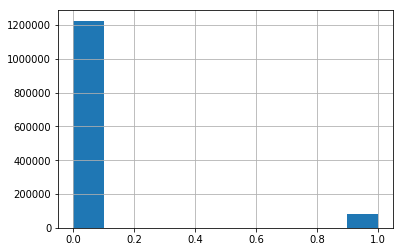

In [21]:
import matplotlib.pyplot as plt
train_his = train["target"]
a = train_his.hist()

In [31]:
# targets values number
print(sum(train["target"].values), "   sentences' targets are 1")
print(train["target"].shape[0]-sum(train["target"].values), " sentences' targets are 0")

80810    sentences' targets are 1
1225312  sentences' targets are 0
